# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your Ames Housing data model using a train-test split.

## Objectives

You will be able to:

* Perform a train-test split
* Prepare training and testing data for modeling
* Compare training and testing errors to determine if model is over or underfitting

## Let's Use Our Ames Housing Data Again!

We included the code to load the data below.

In [1]:
# Run this cell without changes
import pandas as pd
import numpy as np
ames = pd.read_csv('ames.csv', index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


## Perform a Train-Test Split

Use `train_test_split` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) with the default split size. At the end you should have `X_train`, `X_test`, `y_train`, and `y_test` variables, where `y` represents `SalePrice` and `X` represents all other columns. It is also important to set a random state so that your results will be repeatable. 

In [2]:
# Your code here: split the data into training and test sets
# Define X (features) and y (target)
X = ames.drop(columns=['SalePrice'])
y = ames['SalePrice']

# Perform the train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1095, 79) (365, 79) (1095,) (365,)


## Prepare Both Sets for Modeling

This code is completed for you and should work as long as the correct variables were created.

In [3]:
# Run this cell without changes
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

continuous = ['LotArea', '1stFlrSF', 'GrLivArea']
categoricals = ['BldgType', 'KitchenQual', 'Street']

# Instantiate transformers
log_transformer = FunctionTransformer(np.log, validate=True)
ohe = OneHotEncoder(drop='first', sparse=False)

# Fit transformers
log_transformer.fit(X_train[continuous])
ohe.fit(X_train[categoricals])

# Transform training data
X_train = pd.concat([
    pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
    pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
], axis=1)

# Transform test data
X_test = pd.concat([
    pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
    pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
], axis=1)

## Fit a Linear Regression on the Training Data

In [5]:
# Your code here: import the linear regression model class, initialize a model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [7]:
# Your code here: fit the model to train data
model.fit(X_train, y_train)

LinearRegression()

## Evaluate and Validate Model

### Generate Predictions on Training and Test Sets

In [8]:
# Your code here: generate predictions for both sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

### Calculate the Mean Squared Error (MSE)

You can use `mean_squared_error` from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)).

In [9]:
# Your code here: calculate training and test MSE
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Training MSE:", mse_train)
print("Test MSE:", mse_test)

Training MSE: 1772517384.9791176
Test MSE: 1982741233.3656313


If your test error is substantially worse than the train error, this is a sign that the model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train-test split. By default, scikit-learn allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

## Level Up: Evaluate the Effect of Train-Test Split Size

Iterate over a range of train-test split sizes from .5 to .9. For each of these, generate a new train/test split sample. Preprocess both sets of data. Fit a model to the training sample and calculate both the training error and the test error (MSE) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

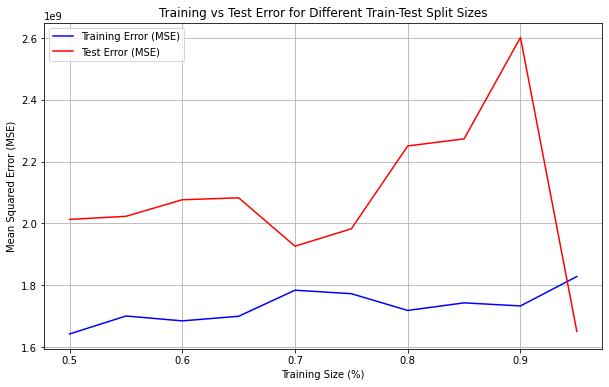

In [10]:
# Your code here
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the range of train-test split sizes
split_sizes = np.arange(0.5, 1.0, 0.05)

# Initialize lists to store the MSE values for training and test sets
train_errors = []
test_errors = []

# Loop through the different split sizes
for train_size in split_sizes:
    # Split the data into training and test sets with the current train size
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
    
    # Apply preprocessing (log transformation for continuous and one-hot encoding for categorical)
    X_train_transformed = pd.concat([
        pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
        pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
    ], axis=1)
    
    X_test_transformed = pd.concat([
        pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
        pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
    ], axis=1)
    
    # Initialize and fit the model
    model = LinearRegression()
    model.fit(X_train_transformed, y_train)
    
    # Make predictions on both training and test sets
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)
    
    # Calculate MSE for both the training and test sets
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    # Store the MSE values
    train_errors.append(mse_train)
    test_errors.append(mse_test)

# Plot the training and test errors as a function of the training size
plt.figure(figsize=(10, 6))
plt.plot(split_sizes, train_errors, label='Training Error (MSE)', color='blue')
plt.plot(split_sizes, test_errors, label='Test Error (MSE)', color='red')
plt.xlabel('Training Size (%)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training vs Test Error for Different Train-Test Split Sizes')
plt.legend()
plt.grid(True)
plt.show()


### Extension

Repeat the previous example, but for each train-test split size, generate 10 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

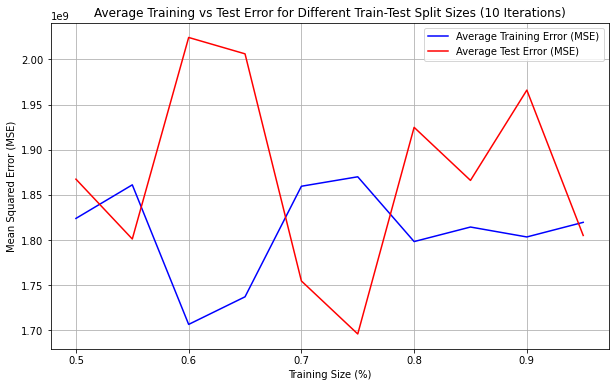

In [11]:
# Your code here
import numpy as np
split_sizes = np.arange(0.5, 1.0, 0.05)

# Initialize lists to store the average MSE values for training and test sets
avg_train_errors = []
avg_test_errors = []

# Loop through the different split sizes
for train_size in split_sizes:
    # Initialize lists to store errors for each of the 10 iterations
    train_errors_iter = []
    test_errors_iter = []
    
# Iterate over
    for _ in range(10):
        # Split the data into training and test sets with the current train size
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=None)
        
        # Apply preprocessing (log transformation for continuous and one-hot encoding for categorical)
        X_train_transformed = pd.concat([
            pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
            pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
        ], axis=1)
        
        X_test_transformed = pd.concat([
            pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
            pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
        ], axis=1)
        
        # Initialize and fit the model
        model = LinearRegression()
        model.fit(X_train_transformed, y_train)
        
        # Make predictions on both training and test sets
        y_train_pred = model.predict(X_train_transformed)
        y_test_pred = model.predict(X_test_transformed)
        
        # Calculate MSE for both the training and test sets
        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)
        
        # Store the errors for this iteration
        train_errors_iter.append(mse_train)
        test_errors_iter.append(mse_test)
    
    # Calculate the average errors for this split size
    avg_train_errors.append(np.mean(train_errors_iter))
    avg_test_errors.append(np.mean(test_errors_iter))

# Plot the average training and test errors as a function of the training size
plt.figure(figsize=(10, 6))
plt.plot(split_sizes, avg_train_errors, label='Average Training Error (MSE)', color='blue')
plt.plot(split_sizes, avg_test_errors, label='Average Test Error (MSE)', color='red')
plt.xlabel('Training Size (%)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Average Training vs Test Error for Different Train-Test Split Sizes (10 Iterations)')
plt.legend()
plt.grid(True)
plt.show()


What's happening here? Evaluate your result!

##  Summary 

Congratulations! You now practiced your knowledge of MSE and used your train-test split skills to validate your model.